# Summary Statistics

Summary statistics are just simple summaries of networks that allow us to compare and study networks. These summaries can be *local* or *global*.

In this notebook we'll see:
1. Density and degree
2. Local clustering coefficient
3. Global clustering coefficient
4. Expected clustering coefficient
5. Average shortest path

## Density and Degree

Let $G$ be a graph with $n$ vertices and $e$ edges. The **density** of $G$ is $$\frac{2e}{n(n-1)},$$ 
which measures the ratio between the actualy number of edges and the maximum potential number of edges.

The **degree** of a vertex $v\in G$ is the number of edges incident to $v$, which can be computed using the adjacency matrix: $$deg(v_i) = \sum_{j=1}^n a_{ij}.$$ 

The **average degree** of $G$ is the average of its vertex degrees $$\overline{d} = \frac{1}{n}\sum_{i=1}^n deg(v_i).$$

We can also look at the **degree distribution** of a graph, a histogram of degrees across all vertices.

Let's see an example of all of the above. We'll load in a network where nodes are people working at a research institution and there is an edge from $u$ to $v$ if person $u$ sent person $v$ at least one email. [cite data](https://snap.stanford.edu/data/email-Eu-core.html)

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections

In [59]:
edgelist = np.loadtxt('../data/email-Eu-core.txt')
G = nx.Graph()
G.add_edges_from(edgelist)
n = G.number_of_nodes()
e = G.number_of_edges()
d = 2*e/(n*(n-1))
avDeg = sum(dict(G.degree()).values())/n
print('There are {} nodes and {} edges in G. \nG has density {:.3f}.\nThe average degree is {:.3f}.'.format(n,e,d,avDeg))

There are 1005 nodes and 16706 edges in G. 
G has density 0.033.
The average degree is 33.246.


<Figure size 1080x1080 with 0 Axes>

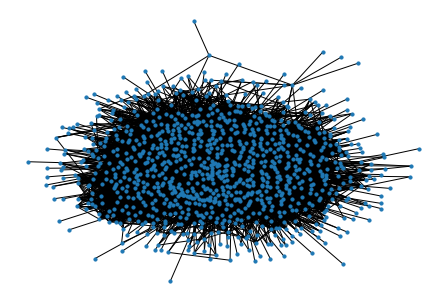

<Figure size 1080x1080 with 0 Axes>

In [88]:
nx.draw_kamada_kawai(G,node_size=10)
plt.figure(figsize=(15,15)) 

We can't deduce much about the graph from the plot, which demonstrates why simple summary statistics can be useful to get a coarse summary. 

Next, we plot the degree distribution.

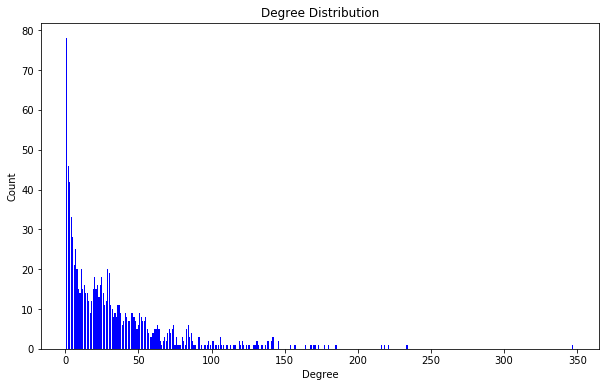

In [33]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.figure(figsize=(10,6))
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

## Clustering Coefficients

The local clustering coefficient is a value assigned to each vertex. It measures the proportion of friends of a person who are friends themselves. The **local clustering coefficient of a vertex $v_i$** is $$C(v_i) = \frac{\sum_{j,k=1}^n a_{ij}a_{jk}a_{ik}}{\sum_{j\neq k}a_{ij}a_{ik}},$$ where by default if both values are $0$ we set $C(v_i)=0$. It measures how 'locally dense' the network is.

The **average clustering coefficient** is the average of the local clustering coefficients, over all vertices in the graph: $$\overline{C} = \frac{1}{n}\sum_{v\in V}C(v).$$

The **global clustering coefficient** is $$C = \frac{3\times\text{number of triangles}}{\text{number of connected triples}},$$ 
where a connected triple is a set of vertices $u,v,w$ where the edges $(u,v)$ and $(v,w)$ exist but the edge $(u,w)$ doesn't necessarily exist.

When dealing with random graphs, there is also the **expected clustering coefficient**
$$E(C) = \frac{3\times\mathbb{E}(\text{number of triangles})}{\mathbb{E}(\text{number of connected triples})}.$$

Let's continue with the same graph as before.

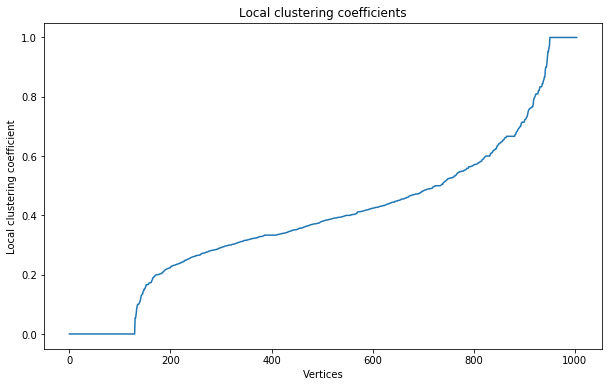

In [53]:
cTotal = list(nx.clustering(G).values())
cTotal.sort()
plt.figure(figsize=(10,6))
plt.plot([x for x in range(n)], cTotal)
plt.title("Local clustering coefficients")
plt.ylabel("Local clustering coefficient")
plt.xlabel("Vertices")
plt.show()

In [58]:
avClustCoeff = nx.average_clustering(G)
globalClust = nx.transitivity(G)
print('The average clustering coefficient is {:.3f} and the global clustering coefficient is {:.3f}.'.format(avClustCoeff, globalClust))

The average clustering coefficient is 0.399 and the global clustering coefficient is 0.267.


## Average Shortest Path

A **path** in a graph is an alternating sequence of vertices and edges, starting and ending on a vertex. The **length** of a path is the number of edges in it (if the graph has edge weights then it is the sum of the weights of the edges in the path). The **distance between two vertices $l(v_i,v_j)$** is the length of the shortest path connecting them. 

A graph is **connected** if there is a path between every pair of vertices and it is disconnected otherwise. The **average shortest path length** is $$l = \frac{1}{n(n-1)}\sum_{i\neq j}l(v_i,v_j),$$ which is defined only for connected graphs. It captures how *globally connected* a graph is.

The example we've been working with so far isn't connected, but we can take the largest connected component and investigate $l$ there. 

In [87]:
notConn = nx.is_connected(G)
connComp = [len(c) for c in nx.connected_components(G)]
numComps = len(connComp)
print('Is G connected? {}. \nG has {} connected components, with the following sizes: \n{}.'.format(notConn, numComps, connComp))

Is G connected? False. 
G has 20 connected components, with the following sizes: 
[986, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1].


There are only $19$ isolated vertices that are outside of the main component. Whilst not insignificant, it's a small enough number to ignore for the remainder of the computations.

In [70]:
largest_cc = max(nx.connected_components(G), key=len)
S = G.subgraph(largest_cc).copy()
avShortestPath = nx.average_shortest_path_length(S)
print('The average shortest path length in the largest connected component of G is {:.3f}'.format(avShortestPath))

The average shortest path length in the largest connected component of G is 2.587
